In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('data/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


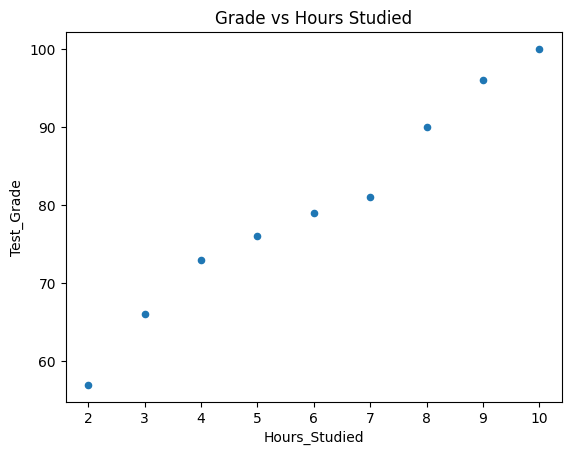

In [3]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

In [4]:
print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


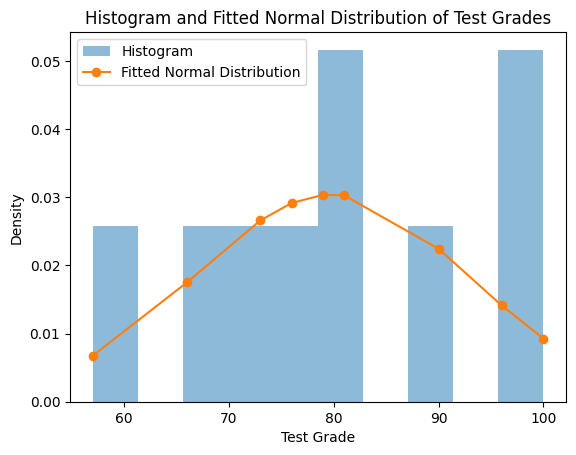

In [7]:
# Fit a normal distribution to the data
fit = stats.norm.pdf(df['Test_Grade'], np.mean(df['Test_Grade']), np.std(df['Test_Grade']))

# Plot the histogram
plt.hist(df['Test_Grade'], density=True, alpha=0.5, label='Histogram')  # alpha adds transparency to the bars

# Plot the fitted normal distribution
plt.plot(df['Test_Grade'], fit, '-o', label='Fitted Normal Distribution')

# Set x-label and y-label
plt.xlabel('Test Grade')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.title('Histogram and Fitted Normal Distribution of Test Grades')
plt.show()

In [13]:
x = df['Hours_Studied'].values[:, np.newaxis]  # Convert to NumPy array and add a new axis
y = df['Test_Grade'].values                    # Dependent variable

In [14]:
# Create linear regression object
lr = lm.LinearRegression()

In [15]:
# Train the model using the training sets
lr.fit(x, y)

LinearRegression()

In [16]:
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


In [18]:
# manual prediction for a given value of x
print("Manual prdiction :", 49.67777777777776 + 5.01666667*6)

Manual prdiction : 79.77777779777776


In [20]:
predicted_value = lr.predict(np.array([6]).reshape(-1, 1))
print("Using predict function:", predicted_value)

Using predict function: [79.77777778]


Text(0.5, 0, 'Hours_Studied')

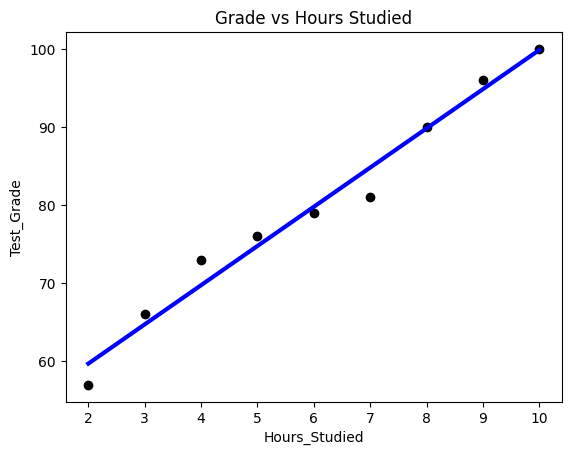

In [21]:
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')